# Austin Reed

## CLIM680 Final Project- Fall 2021

Step 1: import all necessary packages!

In [12]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.feature import NaturalEarthFeature
from cartopy.feature import COASTLINE
from clim680_function import xyticks

In [13]:
f= '/scratch/areed29/ERA5data/*.nc' #loads in Netcdf ERA5data
DS1 = xr.open_mfdataset(f) #opens the file
#print(DS1)
data_lat= DS1.latitude.values #latitude array
data_lon= DS1.longitude.values #longitude array
nlats = len(data_lat[:]) #length of latitude array
nlons = len(data_lon[:]) #length of longitude array
time = DS1.time #time array
ds_mean = DS1.mean(dim=('expver')) # average over the expver variable (axis 1) to get rid of it for now and get a 3D array of time,lat,lon
total_cloud_cover = ds_mean.tcc #total cloud cover
total_precip= ds_mean.tp #total precipitation
column_cloud_wv = ds_mean.tcwv #total column cloud liquid water

### Assignment 1, with modifications: Multi-panel contour plots of the first time

In [14]:
plot_fields = [total_cloud_cover[0,:,:],total_precip[0,:,:],column_cloud_wv[0,:,:]]
print(plot_fields)

[<xarray.DataArray 'tcc' (latitude: 401, longitude: 241)>
dask.array<getitem, shape=(401, 241), dtype=float32, chunksize=(401, 241), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 -20.0 -19.75 -19.5 -19.25 ... 39.5 39.75 40.0
  * latitude   (latitude) float32 50.0 49.75 49.5 49.25 ... -49.5 -49.75 -50.0
    time       datetime64[ns] 1979-01-01, <xarray.DataArray 'tp' (latitude: 401, longitude: 241)>
dask.array<getitem, shape=(401, 241), dtype=float32, chunksize=(401, 241), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 -20.0 -19.75 -19.5 -19.25 ... 39.5 39.75 40.0
  * latitude   (latitude) float32 50.0 49.75 49.5 49.25 ... -49.5 -49.75 -50.0
    time       datetime64[ns] 1979-01-01, <xarray.DataArray 'tcwv' (latitude: 401, longitude: 241)>
dask.array<getitem, shape=(401, 241), dtype=float32, chunksize=(401, 241), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 -20.0 -19.75 -19.5 -19.25 ... 39.5 39.75 40.0
  * 

/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle vi

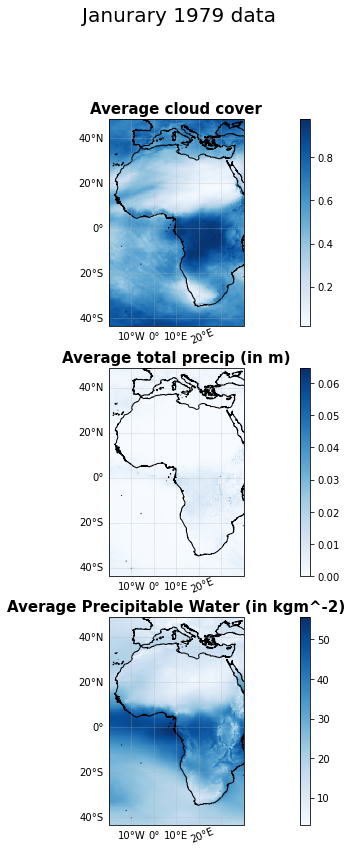

In [19]:
#Contour plots of the first time: Janurary 1979
labels = ['Average cloud cover','Average total precip (in m)', 'Average Precipitable Water (in kgm^-2)']
fig = plt.figure(figsize=(20,13))
# Set height padding for plots
fig.set_constrained_layout_pads(w_pad=0., h_pad=0.1, hspace=0., wspace=0.)
#First plot: Total Cloud Cover
ax_cloudcover = fig.add_subplot(3,1,1,projection=ccrs.PlateCarree())
ax_cloudcover.set_extent([-20, 40, -40, 45])
gl = ax_cloudcover.gridlines(draw_labels=True,alpha = 0.3)
gl.xlabels_top = gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10}
gl.ylabel_style = {'size': 10}
coast = NaturalEarthFeature(category='physical', scale='10m',
                            facecolor='none', name='coastline')
feature = ax_cloudcover.add_feature(coast, edgecolor='black')
plot1 = ax_cloudcover.pcolormesh(data_lon,data_lat,plot_fields[0], cmap='Blues')
ax_cloudcover.set_title(labels[0],fontsize = 15,fontweight = 'bold')
fig.colorbar(plot1,ax = ax_cloudcover)
#Second plot: Total Precip
ax_precip = fig.add_subplot(3,1,2,projection=ccrs.PlateCarree())
ax_precip.set_extent([-20,40,-40,45])
gl = ax_precip.gridlines(draw_labels=True,alpha = 0.3)
gl.xlabels_top = gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10}
gl.ylabel_style = {'size': 10}
coast = NaturalEarthFeature(category='physical', scale='10m',
                            facecolor='none', name='coastline')
feature = ax_precip.add_feature(coast, edgecolor='black')
plot2 = ax_precip.pcolormesh(data_lon,data_lat,plot_fields[1], cmap='Blues')
fig.colorbar(plot2,ax = ax_precip)
ax_precip.set_title(labels[1],fontsize = 15,fontweight = 'bold')
#Third plot: Precipitable Water
ax_wv = fig.add_subplot(3,1,3,projection=ccrs.PlateCarree())
ax_wv.set_extent([-20,40,-40,45])
gl = ax_wv.gridlines(draw_labels=True,alpha = 0.3)
gl.xlabels_top = gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10}
gl.ylabel_style = {'size': 10}
coast = NaturalEarthFeature(category='physical', scale='10m',
                            facecolor='none', name='coastline')
feature = ax_wv.add_feature(coast, edgecolor='black')
plot3 = ax_wv.pcolormesh(data_lon,data_lat,plot_fields[2], cmap='Blues')
fig.colorbar(plot3,ax = ax_wv)
ax_wv.set_title(labels[2],fontsize = 15,fontweight = 'bold')

plt.suptitle('Janurary 1979 data',x=0.7,y=1,fontsize = 20)

plt.savefig('/homes/areed29/CLIM680_Fall2021/final_project/figures/Jan1979_plots')

### Subsetting: Calculate climatology and anomaly for a lat/lon point near the Liberian coast

Lat/lon point of interest: 6.7745N,11.0304W #coast of Liberia

In [22]:
ds_liberia = ds_mean.sel(latitude=6.75, longitude=-11.0, method= 'nearest')
ds_climo = ds_mean.groupby('time.month').mean(dim='time') # Calculates the climatology
pt_ds_climo = ds_climo.sel(latitude =6.75, longitude = -11.0, method = 'nearest') #Select the climo for liberia
ds_pt_1979 = ds_liberia.sel(time= slice('1979-01-01', '1979-12-01')) #select 1979 data for Liberia
ds_pt_2020 = ds_liberia.sel(time= slice('2020-01-01','2020-12-01')) #select 2020 data for Liberia
ds_anoms = ds_mean.groupby('time.month') -ds_climo #calculates the anomaly 
print(ds_anoms)
ds_anomspt = ds_anoms.sel(latitude=6.75, longitude = -11.0, method = 'nearest') # Select the anomaly for Liberia

/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing with an out-of-order index is generating 43 times more chunks
  return self.array[key]
/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing with an out-of-order index is generating 43 times more chunks
  return self.array[key]
/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing with an out-of-order index is generating 43 times more chunks
  return self.array[key]
/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing with an out-of-order index is generating 43 times more chunks
  return self.array[key]
/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing with an out-of-order index is generating 43 tim

<xarray.Dataset>
Dimensions:    (latitude: 401, longitude: 241, time: 513)
Coordinates:
  * longitude  (longitude) float32 -20.0 -19.75 -19.5 -19.25 ... 39.5 39.75 40.0
  * latitude   (latitude) float32 50.0 49.75 49.5 49.25 ... -49.5 -49.75 -50.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-09-01
    month      (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 11 12 1 2 3 4 5 6 7 8 9
Data variables: (12/34)
    cbh        (time, latitude, longitude) float32 dask.array<chunksize=(1, 401, 241), meta=np.ndarray>
    cp         (time, latitude, longitude) float32 dask.array<chunksize=(1, 401, 241), meta=np.ndarray>
    crr        (time, latitude, longitude) float32 dask.array<chunksize=(1, 401, 241), meta=np.ndarray>
    hcc        (time, latitude, longitude) float32 dask.array<chunksize=(1, 401, 241), meta=np.ndarray>
    ilspf      (time, latitude, longitude) float32 dask.array<chunksize=(1, 401, 241), meta=np.ndarray>
    lsm        (time, latitude, longitude) float32 das

Text(0.5, 0.98, 'Liberia Climatology Compared with 1979 and 2020')

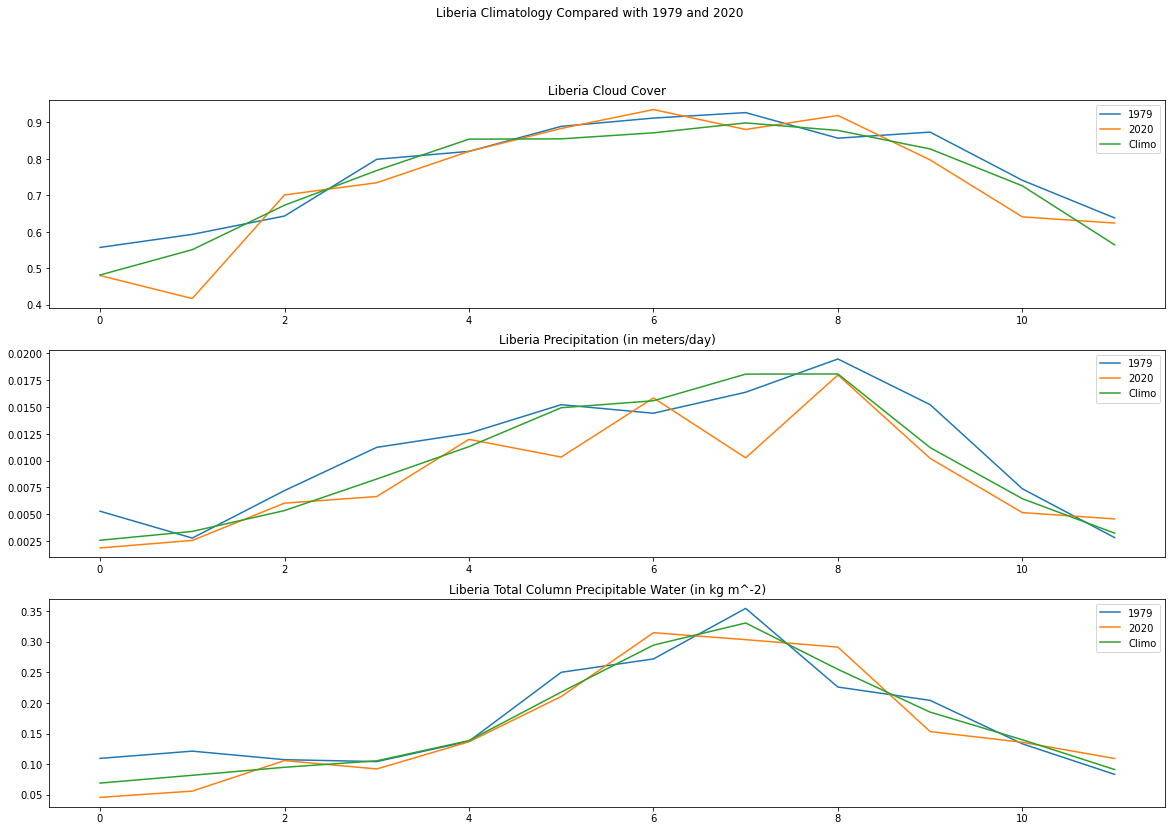

In [23]:
#Climatology time series for Liberia
fig = plt.figure(figsize=(20,13))
# Set height padding for plots
fig.set_constrained_layout_pads(w_pad=0., h_pad=0.1, hspace=0., wspace=0.)
#First plot: Total Cloud Cover
ax_cloudcover = fig.add_subplot(3,1,1)
ax_cloudcover.plot(ds_pt_1979['tcc'])
ax_cloudcover.plot(ds_pt_2020['tcc'])
ax_cloudcover.plot(pt_ds_climo['tcc'])
ax_cloudcover.set_title('Liberia Cloud Cover') 
ax_cloudcover.legend(['1979','2020', 'Climo'])
#Second plot: Total Precip
ax_precip = fig.add_subplot(3,1,2)
ax_precip.plot(ds_pt_1979['tp'])
ax_precip.plot(ds_pt_2020['tp'])
ax_precip.plot(pt_ds_climo['tp'])
ax_precip.set_title('Liberia Precipitation (in meters/day)') 
ax_precip.legend(['1979','2020', 'Climo'])
#Third plot: Total Column Precipitable Water
ax_lw = fig.add_subplot(3,1,3)
ax_lw.plot(ds_pt_1979['tclw'])
ax_lw.plot(ds_pt_2020['tclw'])
ax_lw.plot(pt_ds_climo['tclw'])
ax_lw.set_title('Liberia Total Column Precipitable Water (in kg m^-2)') 
ax_lw.legend(['1979','2020', 'Climo'])
plt.suptitle('Liberia Climatology Compared with 1979 and 2020')

Text(0.5, 0.98, 'Liberia monthly Anomalies')

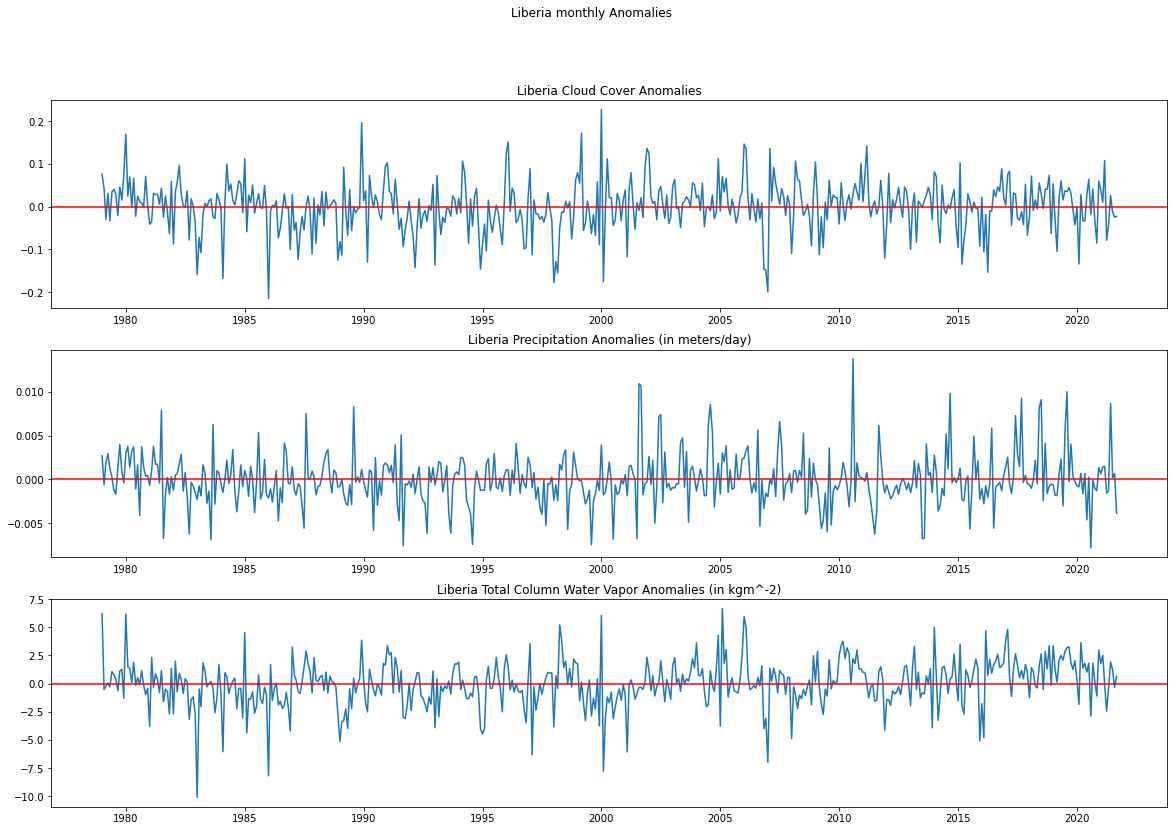

In [25]:
# Anomaly time series for Liberia
fig = plt.figure(figsize=(20,13))
# Set height padding for plots
fig.set_constrained_layout_pads(w_pad=0., h_pad=0.1, hspace=0., wspace=0.)
#First plot: Total Cloud Cover
ax_cloudcover = fig.add_subplot(3,1,1)
ax_cloudcover.plot(ds_anomspt['time'],ds_anomspt['tcc'])
ax_cloudcover.axhline(y=0.0, color='r', linestyle='-')
ax_cloudcover.set_title('Liberia Cloud Cover Anomalies') 
#Second plot: Total Precip
ax_precip = fig.add_subplot(3,1,2)
ax_precip.plot(ds_anomspt['time'], ds_anomspt['tp'])
ax_precip.axhline(y=0.0, color='r', linestyle='-')
ax_precip.set_title('Liberia Precipitation Anomalies (in meters/day)') 
#Fourth plot: Total Column Cloud Water Vapor
ax_wv = fig.add_subplot(3,1,3)
ax_wv.plot(ds_anomspt['time'],ds_anomspt['tcwv'])
ax_wv.axhline(y=0.0, color='r', linestyle='-')
ax_wv.set_title('Liberia Total Column Water Vapor Anomalies (in kgm^-2)') 
plt.suptitle('Liberia monthly Anomalies')

### Not required; but a Seasonal Hovmoller Diagram was visualized for each 3 variables

<xarray.DataArray 'tcc' (time: 513, latitude: 401, longitude: 241)>
dask.array<mean_agg-aggregate, shape=(513, 401, 241), dtype=float32, chunksize=(513, 401, 241), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 -20.0 -19.75 -19.5 -19.25 ... 39.5 39.75 40.0
  * latitude   (latitude) float32 50.0 49.75 49.5 49.25 ... -49.5 -49.75 -50.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-09-01


/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/xarray/core/common.py:1128: UserWarning: Passing ``keep_attrs`` to ``resample`` has no effect and will raise an error in xarray 0.20. Pass ``keep_attrs`` directly to the applied function, e.g. ``resample(...).mean(keep_attrs=True)``.
  "Passing ``keep_attrs`` to ``resample`` has no effect and will raise an"
/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/xarray/core/common.py:1128: UserWarning: Passing ``keep_attrs`` to ``resample`` has no effect and will raise an error in xarray 0.20. Pass ``keep_attrs`` directly to the applied function, e.g. ``resample(...).mean(keep_attrs=True)``.
  "Passing ``keep_attrs`` to ``resample`` has no effect and will raise an"
/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/xarray/core/common.py:1128: UserWarning: Passing ``keep_attrs`` to ``resample`` has no effect and will raise an error in xarray 0.20. Pass ``keep_attrs`` directly to the applied function, e.g. 

Text(0.7, 1, 'Seasonal mean Hovmoller Diagram')

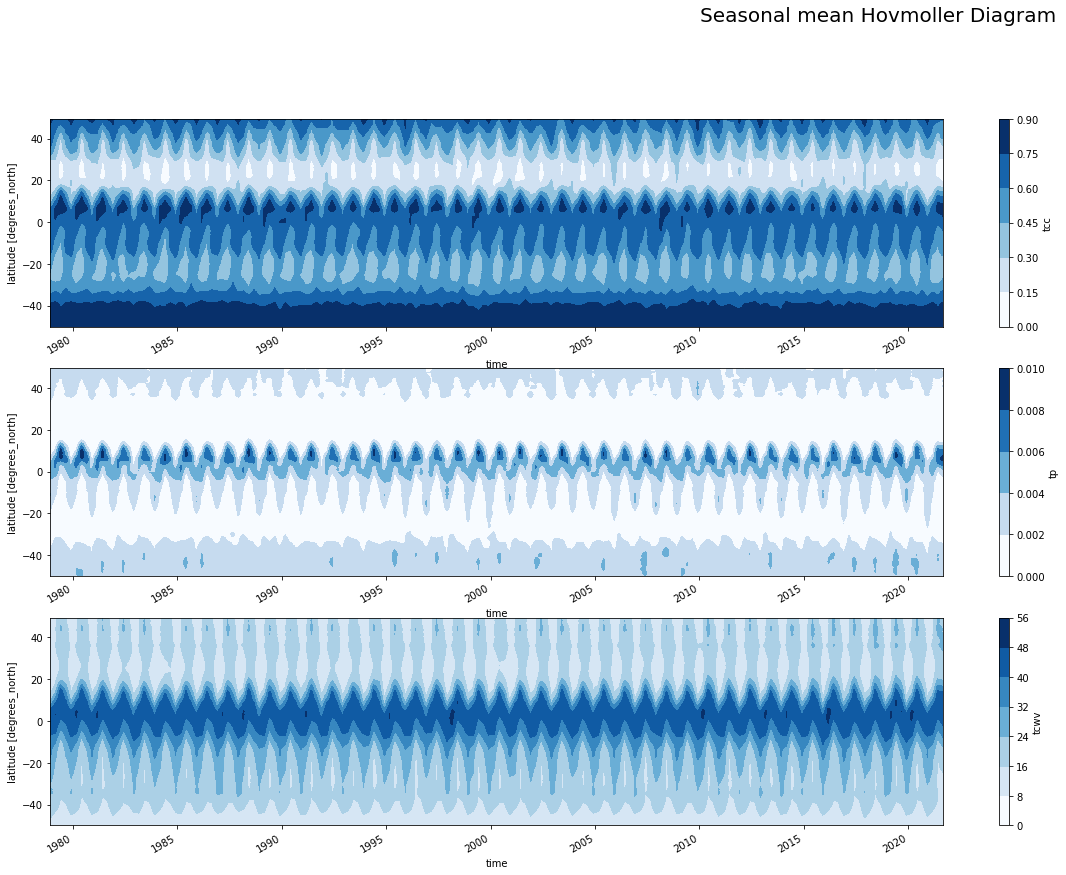

In [27]:
fig = plt.figure(figsize=(20,13))
fig.set_constrained_layout_pads(w_pad=0., h_pad=0.1, hspace=0., wspace=0.)
ax_cloudcover = fig.add_subplot(3,1,1)
clouds=ds_mean.tcc
print(clouds)
selection= clouds.sel(longitude=np.arange(np.nanmin(data_lon),np.nanmax(data_lon),0.5), latitude = np.arange(np.nanmin(data_lat), np.nanmax(data_lat),0.5), method = 'nearest')
#grouped =selection.groupby('time.season').mean(dim=('time','longitude'))
quarterly_time = selection.resample(time='QS-DEC', keep_attrs=True).mean(dim=('time','longitude'))#resamples time to 171
quarterly_time.T.plot.contourf(cmap='Blues')
ax_prcp = fig.add_subplot(3,1,2)
precip=ds_mean.tp
# print(precip)
selection_precip= precip.sel(longitude=np.arange(np.nanmin(data_lon),np.nanmax(data_lon),0.5), latitude = np.arange(np.nanmin(data_lat), np.nanmax(data_lat),0.5), method = 'nearest')
# #grouped_precip =selection_precip.groupby('time.season').mean(dim=('time','longitude'))
quarterly_time_precip = selection_precip.resample(time='QS-DEC', keep_attrs=True).mean(dim=('time','longitude'))#resamples time to 171
quarterly_time_precip.T.plot.contourf(cmap='Blues')
ax_wv = fig.add_subplot(3,1,3)
cloud_wv=ds_mean.tcwv
# print(cloud_wv)
selection_wv= cloud_wv.sel(longitude=np.arange(np.nanmin(data_lon),np.nanmax(data_lon),0.5), latitude = np.arange(np.nanmin(data_lat), np.nanmax(data_lat),0.5), method = 'nearest')
# #grouped_wv =selection_wv.groupby('time.season').mean(dim=('time','longitude'))
quarterly_time_wv = selection_wv.resample(time='QS-DEC', keep_attrs=True).mean(dim=('time','longitude'))#resamples time to 171
quarterly_time_wv.T.plot.contourf(cmap='Blues')
plt.suptitle('Seasonal mean Hovmoller Diagram',x=0.7,y=1,fontsize = 20)